# PRIMER PROYECTO DE DATA SCIENCE

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


## PARTE 1: PENSANDO COMO DATA SCIENTISTS


## Problema

Recientemente nos han incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que nos asignan es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, proponemos crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### POSIBLES VARIABLES DE INTERÉS

* 1° Superficie del inmueble: En base a la superficie cubierta/total es que la mayor parte de los inmuebles es cotizado en el mercado por los tasadores.
* 2° Tipo de inmueble: Si es un local, una cochera o un chalet, existen diferencias notables en el precio de cada uno.
* 3° Zona o barrio: La seguridad, los servicios públicos, los lugares de interes y el valor del suelo en cada barrio modifican el valor del los inmuebles.



  Para poder hacer un analisis mas generalizado, se toman excepciones, como eliminar casos de inmuebles demasiado caros o casos atípicos en los precios y/o superficies
  

# PARTE 2: ANÁLISIS EXPLORATORIO DE DATOS

Realizamos primero la carga de las librerías básicas (luego se añadirán las de sci-kit para ML) y necesarias para poder efectuar el análisis exploratorio de datos correctamente
y también del dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

data = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

Hacemos un primer acercamiento a los datos, mostrando su SHAPE (instancias y columnas) y sus primeros 5 valores, asi como valores nulos

In [2]:
print(data.shape)
print(data.head())
print(data.isnull().sum())

(146660, 19)
   start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD 

Eliminamos las columnas que no aporten algún dato significativo para el análisis propuesto, así como tambien los valores nulos. Usamos el "inplace = True" para poder modificar el dataset. Luego verificamos que las modificaciones hayan sido efectuadas

In [3]:
data.drop(['l1', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'title', 
           'description', 'operation_type', 'currency'], 'columns', inplace = True)
#data.dropna(inplace = True)
print(data.head(), '\n')
print('Valores nulos\n',data.isnull().sum())

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price property_type  
0          140.0            140.0  153000.0  Departamento  
1           70.0             58.0  159000.0            PH  
2           45.0             45.0  125000.0            PH  
3           85.0             50.0  295000.0            PH  
4           50.0             35.0   40000.0            PH   

Valores nulos
 l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price          

Modificamos los nombres de las columnas en general para mejorar su visualización futura en gráficos y cuadros, y para entendimiento de la exploración del dataset

In [4]:
data.rename(columns = {'l2' : 'zona', 'l3':'barrio', 'rooms' : 'ambientes', 
                       'bedrooms' : 'habitaciones', 'bathrooms' : 'baños',
                       'surface_total' : 'superficie_total', 'surface_covered' :
                       'superficie_cubierta', 'price' : 'precio',
                       'property_type' : 'tipo_de_propiedad'}, inplace = True)

Mostramos la cantidad de publicaciones por tipo de propiedad aproximada (ya que eliminamos los valores con alguna columna nula) y además hacemos un gráfico para que la diferencia de cantidades quede clara.

Tipo de propiedad  Cantidad de publicaciones

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: tipo_de_propiedad, dtype: int64


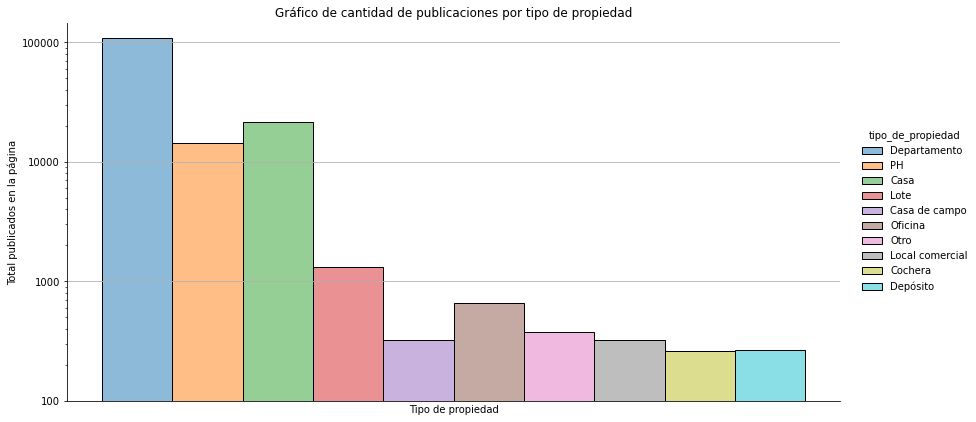

In [5]:
print("Tipo de propiedad  Cantidad de publicaciones\n")
print(data['tipo_de_propiedad'].value_counts())
sns.displot(data, x = 'tipo_de_propiedad', kind = 'hist', hue = 'tipo_de_propiedad', aspect = 2, height = 6)
plt.title("Gráfico de cantidad de publicaciones por tipo de propiedad")
plt.xlabel("Tipo de propiedad")
plt.xticks([])
plt.yscale('log')
plt.yticks((100, 1000, 10000, 100000), ['100', '1000', '10000', '100000'])
plt.ylabel("Total publicados en la página")
plt.grid()

### ^^^ Nota sobre el gráfico ^^^
En el gráfico de arriba, se aprecia que, en comparación con la cantidad de propiedades del tipo Departamento, PH y Casa, el resto de publicaciones para este estudio, no es relevante, para una generalización mejor de datos, y con fines de lograr una perfomance y eficacia mayor al hacer el Test-Split con los modelos de Machine Learning, éstas variables luego serán filtradas.

Vemos la distribución según zona y barrios

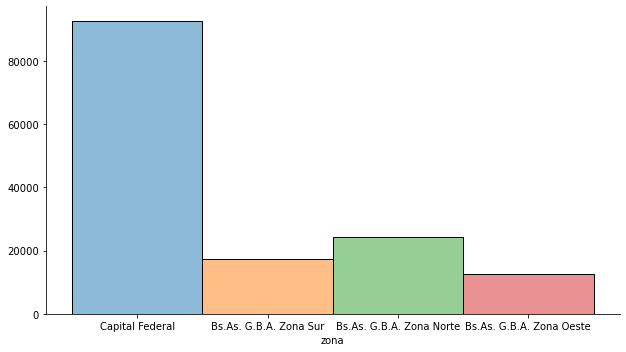

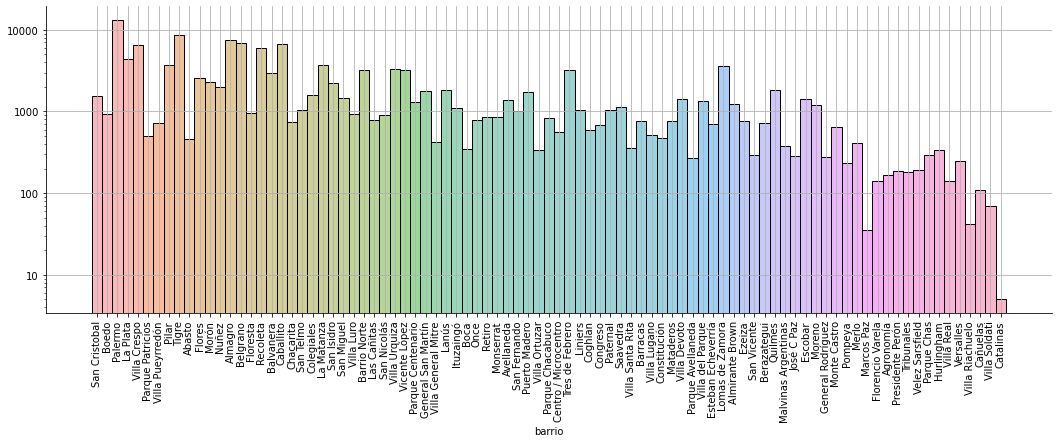

In [6]:
sns.displot(data, x = 'zona', kind = 'hist', hue = 'zona', aspect = 1.8, legend = False)
plt.ylabel('')
sns.displot(x = data['barrio'], kind = 'hist', hue = data['barrio'], aspect = 3, legend = False, row_order = data['barrio'].value_counts().index)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.yticks((10, 100, 1000, 10000), ['10', '100', '1000', '10000'])
plt.ylabel('')
plt.grid()

Con estos datos, filtramos los tipos de propiedades mas publicados que son "Departamento", "Casa" y "PH" junto con la zona que tiene mayor cantidad de publicaciones que es Capital Federal

In [7]:
mascara = ((data['tipo_de_propiedad'] == 'Departamento') | (data['tipo_de_propiedad'] == 'Casa') |
           (data['tipo_de_propiedad'] == 'PH')) & (data['zona'] == 'Capital Federal')

data_mascara = data[mascara]
data_mascara.shape

(91485, 9)

Para poder realizar el siguiente paso de una forma mas fluida, se asignan a los valores nulos que quedan en las distintas variables, la moda de cada una de las columnas o usando un metodo, a fin de obtener una mejor generalización en el modelo de Machine Learning y valores acordes en el estudio de correlación de variables

In [8]:
data_mascara['baños'].fillna(data_mascara['baños'].mode()[0], inplace = True)
data_mascara['superficie_total'].fillna(data_mascara['superficie_total'].mode()[0], inplace = True)
data_mascara['superficie_cubierta'].fillna(data_mascara['superficie_cubierta'].mode()[0], inplace = True)
data_mascara.isnull().sum()

C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


zona                   0
barrio                 0
ambientes              0
habitaciones           0
baños                  0
superficie_total       0
superficie_cubierta    0
precio                 0
tipo_de_propiedad      0
dtype: int64

El próximo paso a seguir, es estudiar la correlación entre variables para cada tipo de propiedad, para poder hacer eso, primero debemos hacer un pequeño estudio para encontrar los valores atípicos para poder generalizar mejor éstas correlaciones. Como primera instancia haremos gráficos de cajas para las siguientes variables para cada tipo de propiedad:

* Superficie Total
* Precio


In [9]:
mascara_casa = data_mascara['tipo_de_propiedad'] == 'Casa'
mascara_ph = data_mascara['tipo_de_propiedad'] == 'PH'
mascara_departamento = data_mascara['tipo_de_propiedad'] == 'Departamento'

(0.0, 800000.0)

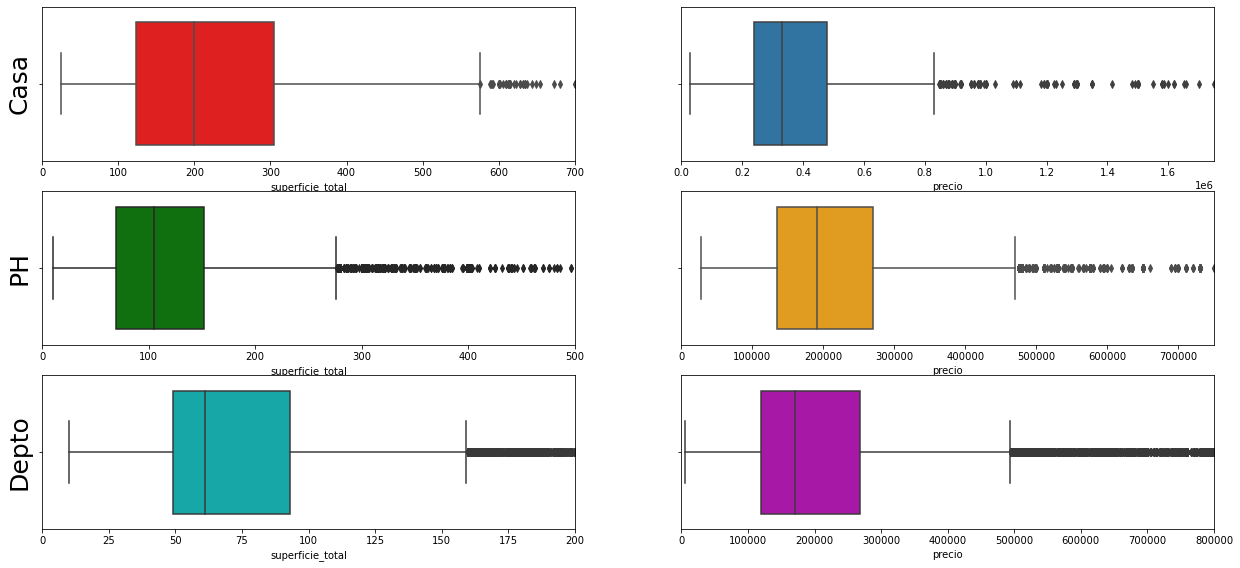

In [10]:
plt.figure(figsize = (7*3,4.8*2))

plt.subplot(3,2,1)
sns.boxplot(data = data_mascara[mascara_casa], x = 'superficie_total', color = 'r')
plt.xlim(0, 700)
plt.ylabel('Casa', size = 25)

plt.subplot(3,2,2)
sns.boxplot(data = data_mascara[mascara_casa], x = 'precio')
plt.xlim(0, 1750000)

plt.subplot(3,2,3)
sns.boxplot(data = data_mascara[mascara_ph], x = 'superficie_total', color = 'g')
plt.xlim(0, 500)
plt.ylabel('PH', size = 25)

plt.subplot(3,2,4)
sns.boxplot(data = data_mascara[mascara_ph], x = 'precio', color = 'orange')
plt.xlim(0, 750000)

plt.subplot(3,2,5)
sns.boxplot(data = data_mascara[mascara_departamento], x = 'superficie_total', color = 'c')
plt.xlim(0, 200)
plt.ylabel('Depto', size = 25)

plt.subplot(3,2,6)
sns.boxplot(data = data_mascara[mascara_departamento], x = 'precio', color = 'm')
plt.xlim(0, 800000)


Creamos otra máscara para ver los valores dentro de los parámetros elegidos que son:

Para las casas:
* Superficie total entre 50 y 600 m2
* Precio menor a US $ 1.000.000

Para los PH:
* Superficie total entre 30 y 300 m2
* Precio menor a US $ 500.000

Para los Departamentos:
* Superficie total entre 25 y 175 m2
* Precio menor a US $ 550.000

In [11]:
mascara_casa = ((data_mascara['superficie_total'] > data_mascara['superficie_cubierta']) & 
                (data_mascara['superficie_total'] < 600) & 
                (data_mascara['superficie_total'] > 50) & 
                (data_mascara['precio'] < 1000000) &
                (data_mascara['tipo_de_propiedad'] == 'Casa'))

mascara_ph = ((data_mascara['superficie_total'] > data_mascara['superficie_cubierta']) & 
              (data_mascara['superficie_total'] < 300) & 
              (data_mascara['superficie_total'] > 30) & 
              (data_mascara['precio'] < 500000) &
              (data_mascara['tipo_de_propiedad'] == 'PH'))

mascara_departamento = ((data_mascara['superficie_total'] > data_mascara['superficie_cubierta']) & 
                        (data_mascara['superficie_total'] < 175) & 
                        (data_mascara['superficie_total'] > 25) & 
                        (data_mascara['precio'] < 550000) &
                        (data_mascara['tipo_de_propiedad'] == 'Departamento'))

Luego de todo el filtrado, mostramos las correlaciones con un Heatmap y un Pairplot en cada caso

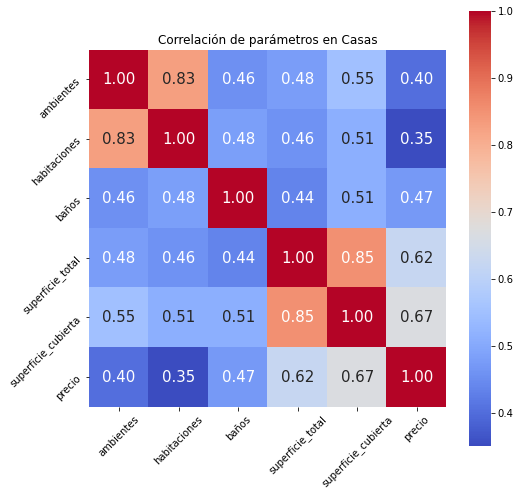

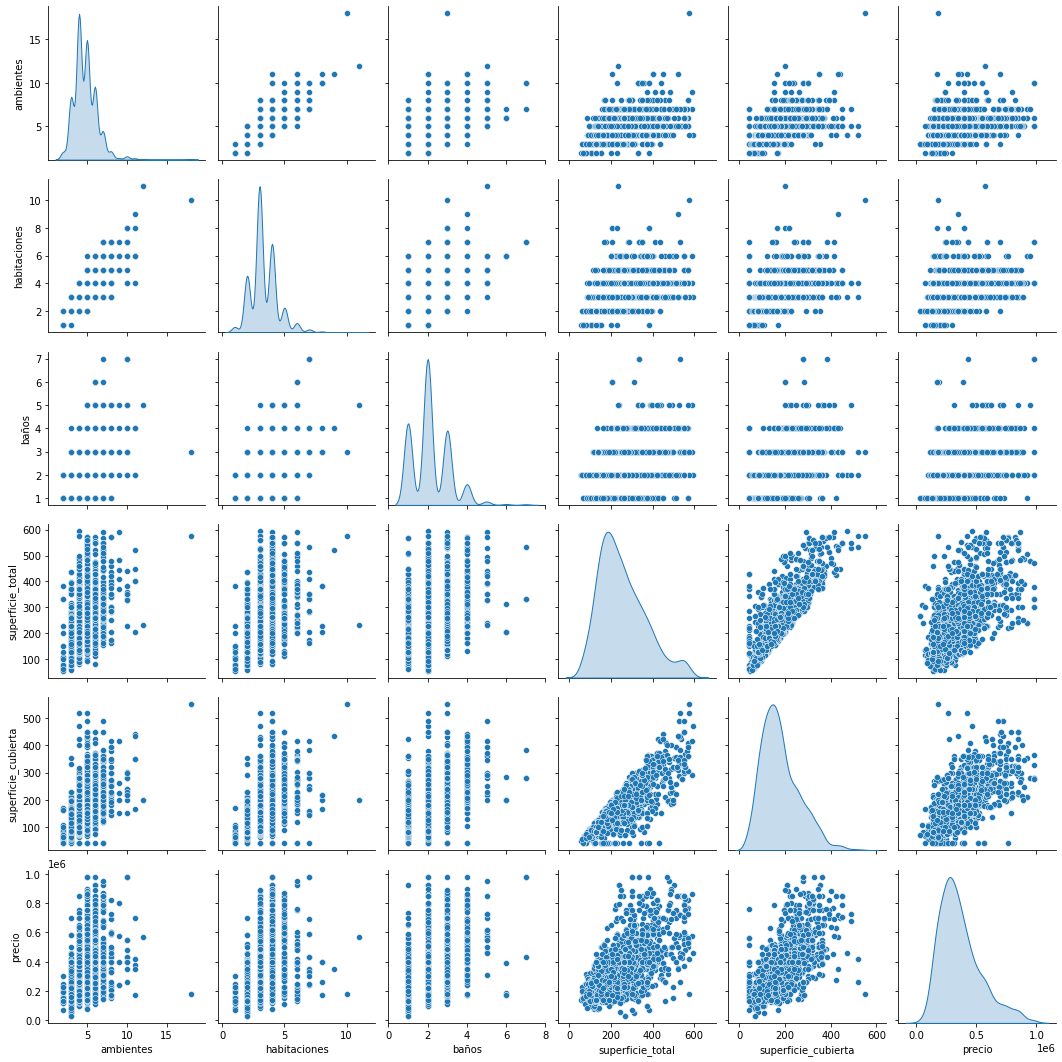

In [12]:
# Primero con las casas
corr_casa  = data_mascara[mascara_casa].drop(columns = ['zona', 'barrio', 'tipo_de_propiedad']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_casa, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 15},
           xticklabels= data_mascara[mascara_casa].drop(columns = ['zona', 'barrio', 'tipo_de_propiedad']).columns, 
           yticklabels= data_mascara[mascara_casa].drop(columns = ['zona', 'barrio', 'tipo_de_propiedad']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación de parámetros en Casas')
sns.pairplot(data = data_mascara[mascara_casa], diag_kind = 'kde')

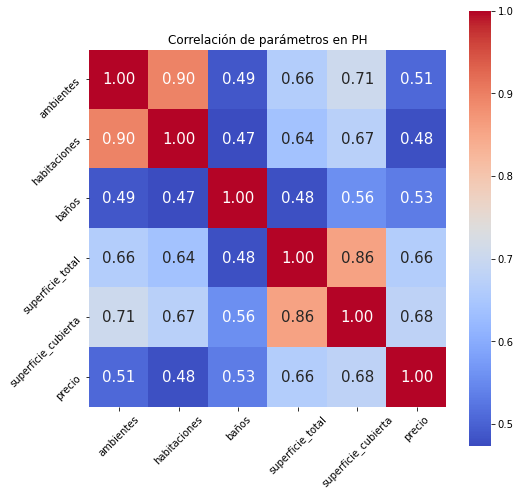

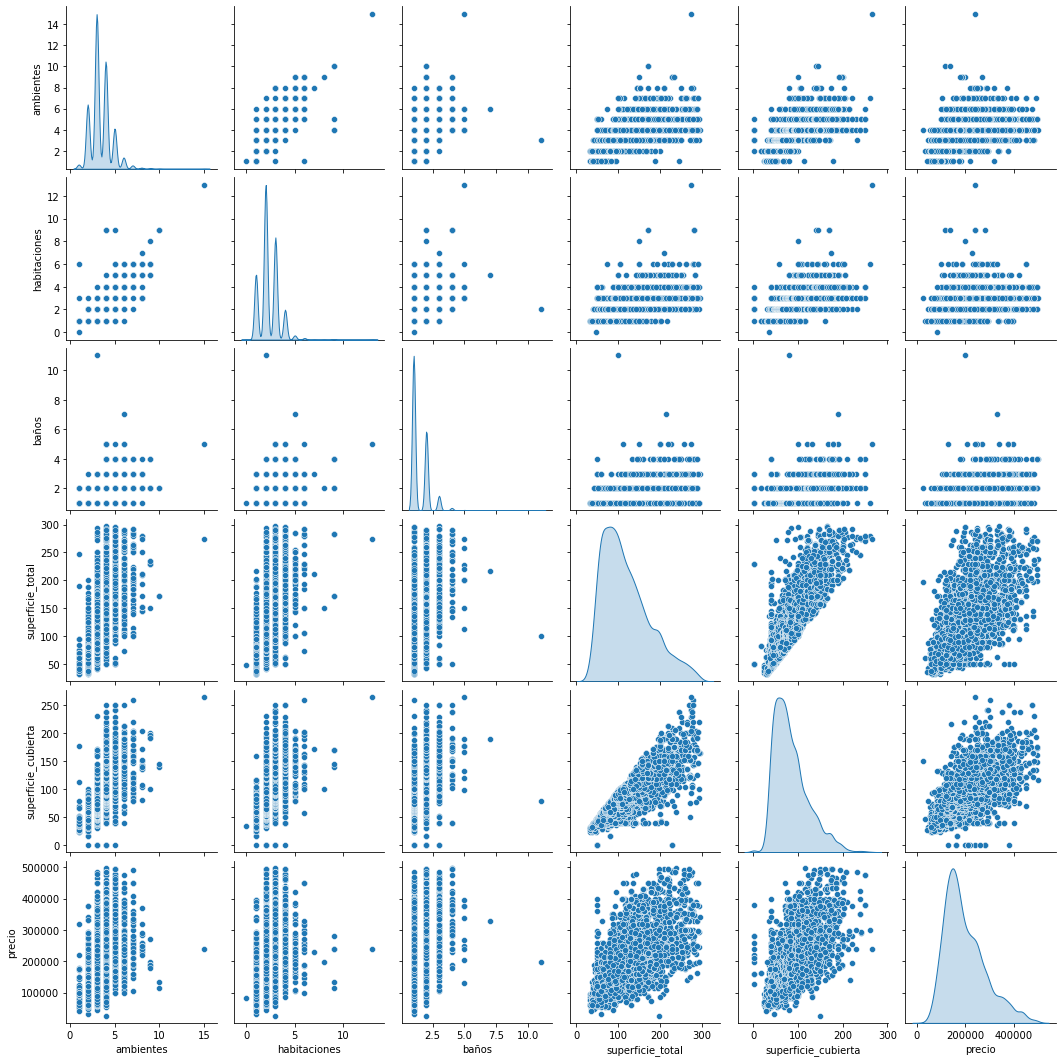

In [13]:
# Luego con los PH
corr_casa  = data_mascara[mascara_ph].drop(columns = ['zona', 'barrio', 'tipo_de_propiedad']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_casa, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 15},
           xticklabels= data_mascara[mascara_ph].drop(columns = ['zona', 'barrio', 'tipo_de_propiedad']).columns, 
           yticklabels= data_mascara[mascara_ph].drop(columns = ['zona', 'barrio', 'tipo_de_propiedad']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación de parámetros en PH')
sns.pairplot(data = data_mascara[mascara_ph], diag_kind = 'kde')

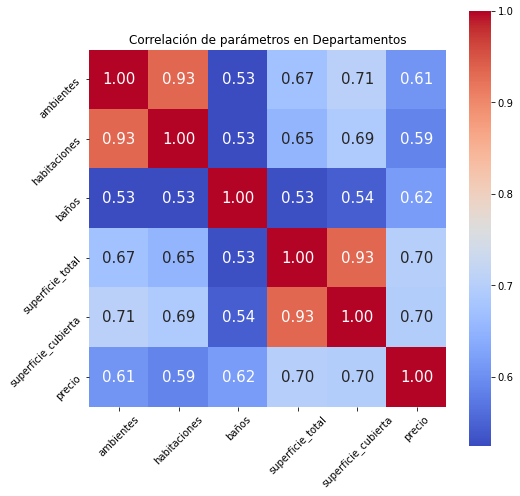

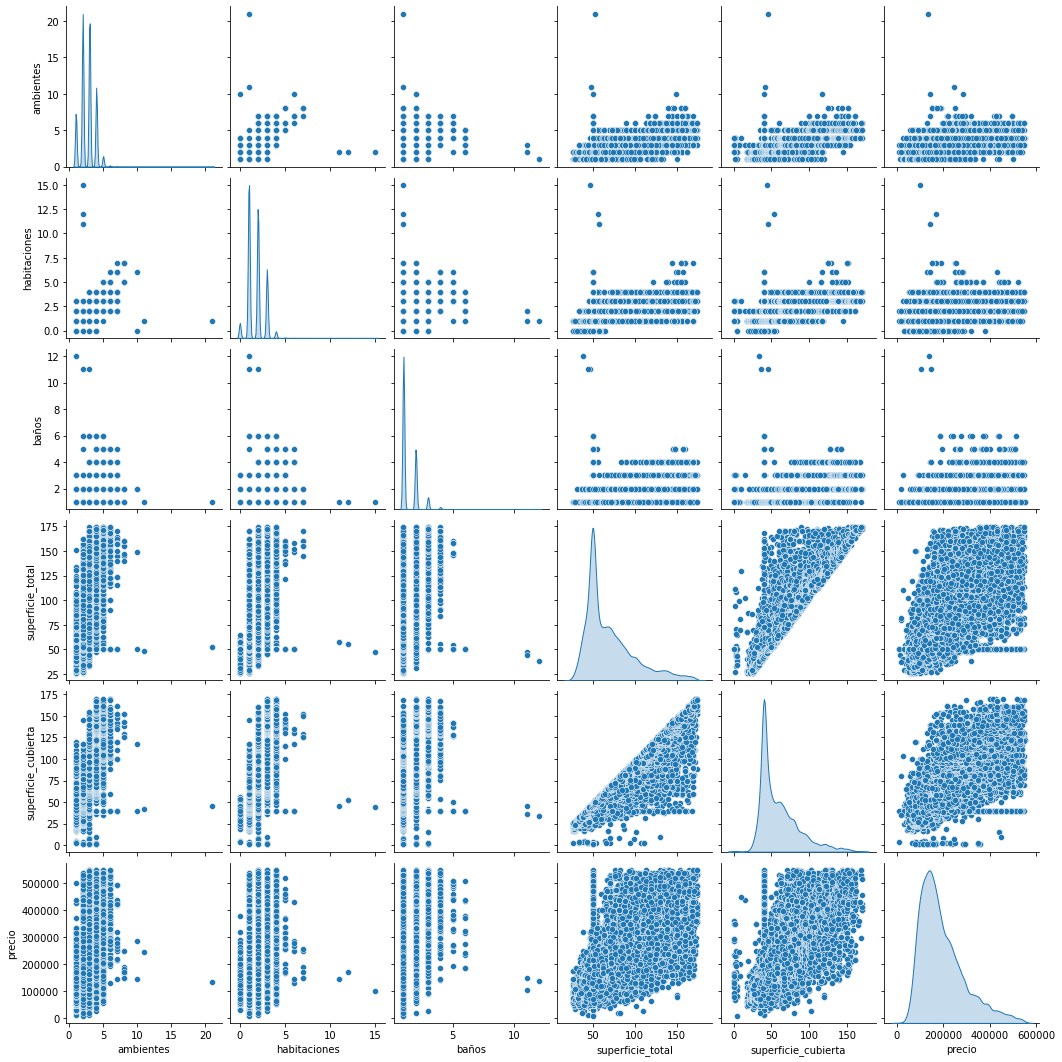

In [14]:
# Y por ultimo con los departamentos
corr_casa  = data_mascara[mascara_departamento].drop(columns = ['zona', 'barrio', 'tipo_de_propiedad']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_casa, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 15},
           xticklabels= data_mascara[mascara_departamento].drop(columns = ['zona', 'barrio', 'tipo_de_propiedad']).columns, 
           yticklabels= data_mascara[mascara_departamento].drop(columns = ['zona', 'barrio', 'tipo_de_propiedad']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación de parámetros en Departamentos')
sns.pairplot(data = data_mascara[mascara_departamento], diag_kind = 'kde')

### PARTE 3: MACHINE LEARNING

Para empezar, vale la aclaración de que no tomo los parámetros indicados en el ejercicio, sino que sigo mis lineamientos para poder aplicar mejor los modelos y que tengan un menor error y siendo así mas útiles para un caso real.

En primera instancia, cargaremos todas las librerías necesarias para hacer todas las tareas que vamos a realizar el 'test split', crear los distintos modelos (KNN, Decision Tree, Linear Regression) y medir su error.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Luego definimos una funcion que nos devuelva los parametros de un Test Split, para poder entrenar y probar los distintos modelos de machine learning con esos datos, ya que para cada modelo haremos 3 instancias, una para cada tipo de propiedad (Casa, PH, Departamento)

In [16]:
def split_de_datos(features, objetivo):
    '''
    Ésta funcion nos permite facilmente ingresar los features y el objetivo
    para poder hacer un split de un dataset
    
    LIBRERIAS NECESARIAS:
    sklearn.model_selection --> train_test_split
    pandas
    '''

    X_train, X_test, y_train, y_test = train_test_split(
                  features, objetivo, test_size=0.30, random_state=42)
    return X_train, X_test, y_train, y_test

Definimos los features para todas las propiedades con sus respectivas máscaras.

In [17]:
X_casa = data_mascara[mascara_casa][['ambientes', 'habitaciones', 'baños', 
                                     'superficie_cubierta', 'superficie_total']]
y_casa = data_mascara[mascara_casa]['precio']

X_ph = data_mascara[mascara_ph][['ambientes', 'habitaciones', 'baños',
                                 'superficie_cubierta', 'superficie_total']]
y_ph = data_mascara[mascara_ph]['precio']

X_departamento = data_mascara[mascara_departamento][['ambientes', 'habitaciones',
                                                     'baños', 'superficie_cubierta', 'superficie_total']]
y_departamento = data_mascara[mascara_departamento]['precio']

Usamos la funcion creada para obtener los distintos test split para cada tipo de propiedad

In [18]:
X_train_casa, X_test_casa, y_train_casa, y_test_casa = split_de_datos(X_casa, y_casa)

X_train_ph, X_test_ph, y_train_ph, y_test_ph = split_de_datos(X_ph, y_ph)

X_train_departamento, X_test_departamento, y_train_departamento, y_test_departamento = split_de_datos(X_departamento, y_departamento)

Creamos primero tres modelos de Regresión Lineal para ph, casa y departamento y los entrenamos

In [19]:
regresor_linear_casa = LinearRegression()
regresor_linear_ph = LinearRegression()
regresor_linear_departamento = LinearRegression()

regresor_linear_casa.fit(X_train_casa, y_train_casa)
regresor_linear_ph.fit(X_train_ph, y_train_ph)
regresor_linear_departamento.fit(X_train_departamento, y_train_departamento)

LinearRegression()

Ahora creamos una función que prediga con el modelo en el train y test, y luego nos muestre dos gráficos, uno con los RMSE en train/test y otro con los valores predichos de y_test

In [20]:
def model_predict_rmse_graph(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Luego las usamos en los 3 primeros modelos de regresión lineal

Raíz del error cuadrático medio en Train: 125842.04963295213
Raíz del error cuadrático medio en Test: 126457.34422427526


C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


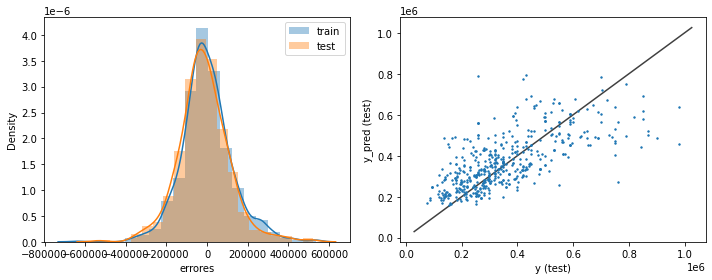

In [21]:
model_predict_rmse_graph(regresor_linear_casa, X_train_casa, 
                         X_test_casa, y_train_casa, y_test_casa)

Raíz del error cuadrático medio en Train: 58487.19628645263
Raíz del error cuadrático medio en Test: 59595.60380330385


C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


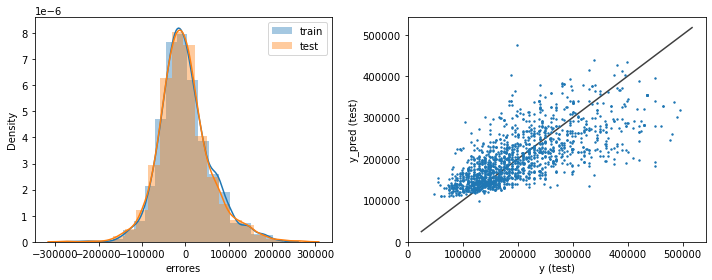

In [22]:
model_predict_rmse_graph(regresor_linear_ph, X_train_ph,
                         X_test_ph, y_train_ph, y_test_ph)

Raíz del error cuadrático medio en Train: 61459.177320890776
Raíz del error cuadrático medio en Test: 62506.12358991394


C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


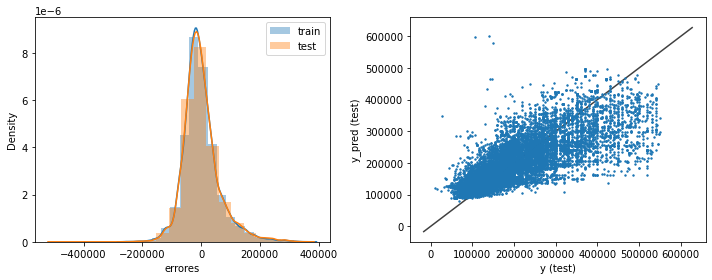

In [23]:
model_predict_rmse_graph(regresor_linear_departamento, X_train_departamento,
                         X_test_departamento, y_train_departamento, y_test_departamento)

Ahora haremos lo mismo pero con KNN Regressor y Decision Tree Regressor, creando los modelos, ajustando hiperparámetros, eligiendo los mejores y realizando los gráficos correspondientes.

Primero creamos una función para poder ajustar los hiperparámetros.

In [24]:
def knn_hiperparam(titulo, k_vecinos, X_train, X_test, y_train, y_test):
    # Definimos las listas vacias para los valores de error deseados
    lista_error_train = []
    lista_error_test = []
    
    for k in k_vecinos:
        # Definir el modelo con el valor de vecinos deseado
        clf = KNeighborsRegressor(n_neighbors= k)

        # Entrenar el modelo
        clf.fit(X_train, y_train)

        # Predecir y evaluar sobre el set de entrenamiento
        y_train_pred = clf.predict(X_train)
        train_err = np.sqrt(mean_squared_error(y_train, y_train_pred))

        # Predecir y evaluar sobre el set de evaluación
        y_test_pred = clf.predict(X_test)
        test_err = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Agregar la información a las listas
        lista_error_train.append(train_err)
        lista_error_test.append(test_err)
        
    plt.plot(k_vecinos, lista_error_train,'o-',label='train' )
    plt.plot(k_vecinos, lista_error_test, 'o-',label='test')
    plt.legend()
    plt.title(titulo)
    plt.xlabel('k_vecinos')
    plt.ylabel('error')

Mostramos la gráfica de error para cada caso

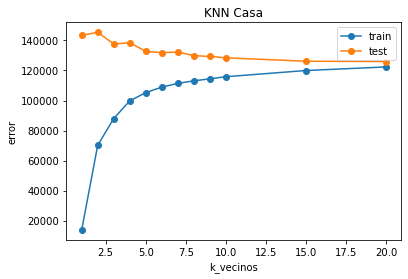

In [25]:
knn = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

# Casa
knn_hiperparam('KNN Casa', knn, X_train_casa, X_test_casa, y_train_casa, y_test_casa)

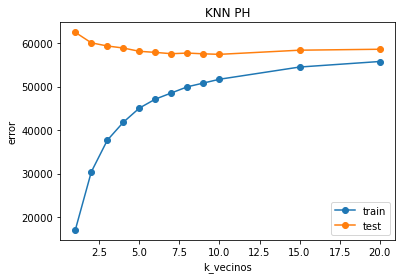

In [26]:
#PH
knn_hiperparam('KNN PH', knn, X_train_ph, X_test_ph, y_train_ph, y_test_ph)

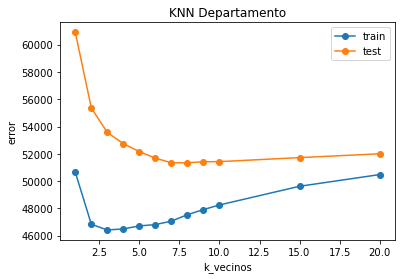

In [27]:
#Departamento
knn_hiperparam('KNN Departamento', knn, X_train_departamento, 
               X_test_departamento, y_train_departamento, y_test_departamento)

Definimos como mejores K de vecinos:

* 5 para Casas
* 5 para PHs
* 8 para Departamentos

Y aplicamos la función para cada uno de los modelos definidos

Raíz del error cuadrático medio en Train: 105274.26802200596
Raíz del error cuadrático medio en Test: 132776.3007851526


C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


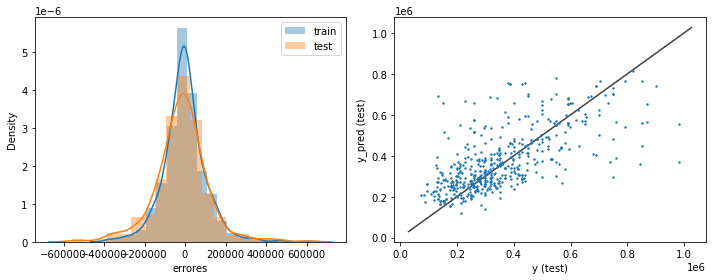

In [28]:
# Casa
print('KNN REGRESSOR PARA CASAS')
knnregressor_casa = KNeighborsRegressor(n_neighbors= 5)
knnregressor_casa.fit(X_train_casa, y_train_casa)
model_predict_rmse_graph(knnregressor_casa, X_train_casa, X_test_casa, y_train_casa, y_test_casa)

Raíz del error cuadrático medio en Train: 45060.972130853006
Raíz del error cuadrático medio en Test: 58096.39810649226


C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


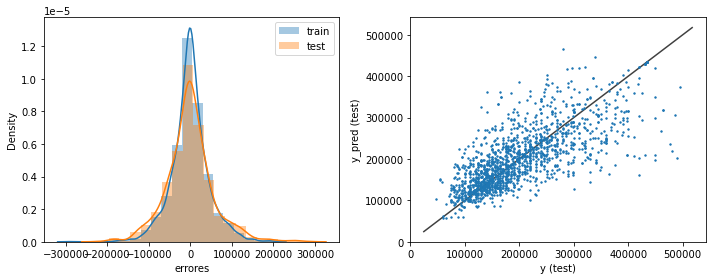

In [29]:
# PH
print('KNN REGRESSOR PARA PH')
knnregressor_ph = KNeighborsRegressor(n_neighbors= 5)
knnregressor_ph.fit(X_train_ph, y_train_ph)
model_predict_rmse_graph(knnregressor_ph, X_train_ph, X_test_ph, y_train_ph, y_test_ph)

Raíz del error cuadrático medio en Train: 46709.80137471751
Raíz del error cuadrático medio en Test: 52164.253316220216


C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


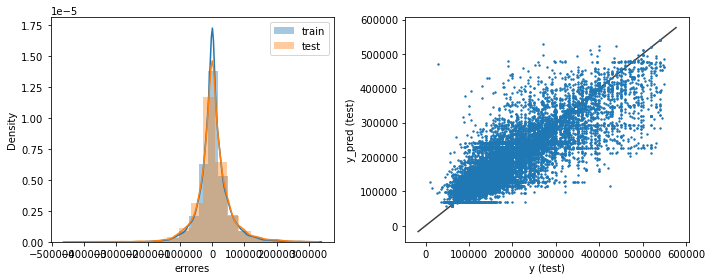

In [30]:
# Departamento
print('KNN REGRESSOR PARA DEPARTAMENTOS')
knnregressor_departamento = KNeighborsRegressor(n_neighbors= 5)
knnregressor_departamento.fit(X_train_departamento, y_train_departamento)
model_predict_rmse_graph(knnregressor_departamento, X_train_departamento, 
                         X_test_departamento, y_train_departamento, y_test_departamento)

Y por último, nos queda hacer el mismo procedimiento con un Decision Tree Regressor

In [33]:
def decision_tree_hiperparam(titulo, max_depth, X_train, X_test, y_train, y_test):
    # Definimos las listas vacias para los valores de error deseados
    lista_error_train = []
    lista_error_test = []
    
    for i in max_depth:
        # Definir el modelo con el valor de vecinos deseado
        clf = DecisionTreeRegressor(max_depth = i, random_state = 42)

        # Entrenar el modelo
        clf.fit(X_train, y_train)

        # Predecir y evaluar sobre el set de entrenamiento
        y_train_pred = clf.predict(X_train)
        train_err = np.sqrt(mean_squared_error(y_train, y_train_pred))

        # Predecir y evaluar sobre el set de evaluación
        y_test_pred = clf.predict(X_test)
        test_err = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Agregar la información a las listas
        lista_error_train.append(train_err)
        lista_error_test.append(test_err)
        
    plt.plot(max_depth, lista_error_train,'o-',label='train' )
    plt.plot(max_depth, lista_error_test, 'o-',label='test')
    plt.legend()
    plt.title(titulo)
    plt.xlabel('max_depth')
    plt.ylabel('error')

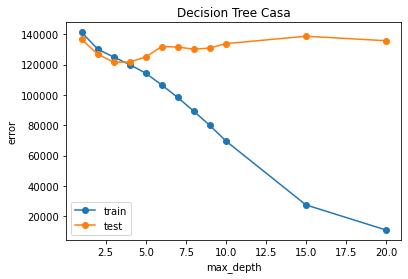

In [34]:
depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

# Casa
decision_tree_hiperparam('Decision Tree Casa', depth, X_train_casa, X_test_casa, y_train_casa, y_test_casa)

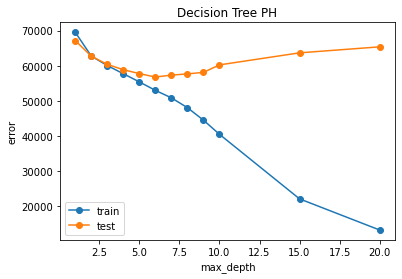

In [35]:
# PH
decision_tree_hiperparam('Decision Tree PH', depth, X_train_ph, X_test_ph, y_train_ph, y_test_ph)

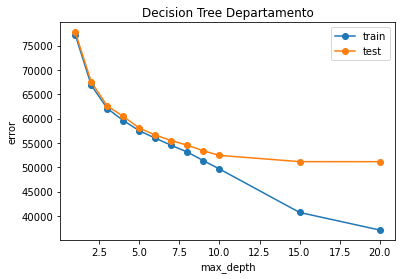

In [36]:
# Departamento
decision_tree_hiperparam('Decision Tree Departamento', depth, X_train_departamento, 
               X_test_departamento, y_train_departamento, y_test_departamento)

Raíz del error cuadrático medio en Train: 106579.91100494936
Raíz del error cuadrático medio en Test: 131926.67240488873


C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


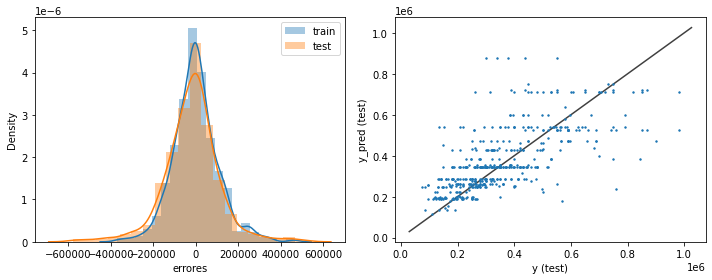

In [37]:
# Casa
dtregressor_casa = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dtregressor_casa.fit(X_train_casa, y_train_casa)
model_predict_rmse_graph(dtregressor_casa, X_train_casa, X_test_casa, y_train_casa, y_test_casa)

Raíz del error cuadrático medio en Train: 50881.375534691615
Raíz del error cuadrático medio en Test: 57343.564453531566


C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


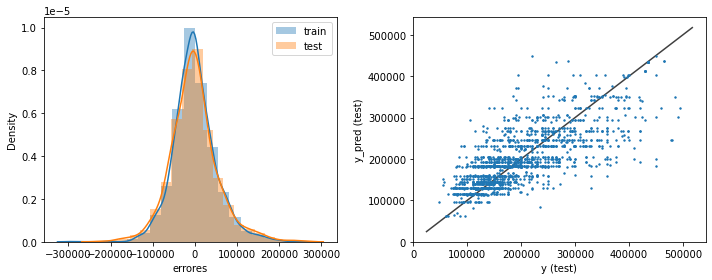

In [38]:
# PH
dtregressor_ph = DecisionTreeRegressor(max_depth = 7, random_state = 42)
dtregressor_ph.fit(X_train_ph, y_train_ph)
model_predict_rmse_graph(dtregressor_ph, X_train_ph, X_test_ph, y_train_ph, y_test_ph)

Raíz del error cuadrático medio en Train: 53113.01339524701
Raíz del error cuadrático medio en Test: 54529.55857566588


C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucho\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


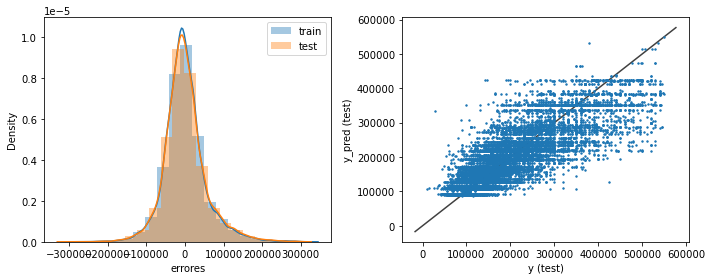

In [39]:
# Departamento
dtregressor_departamento = DecisionTreeRegressor(max_depth = 8, random_state = 42)
dtregressor_departamento.fit(X_train_departamento, y_train_departamento)
model_predict_rmse_graph(dtregressor_departamento, X_train_departamento, 
                         X_test_departamento, y_train_departamento, y_test_departamento)